In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

In [2]:
df = wrangle.get_zillow_data()

csv file found and loaded



In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
train, validate, test = wrangle.prep_zillow(df)

In [5]:
train.head()

,bedrooms,bathrooms,area,propertyvalue,yearbuilt,taxamount,county,Orange,Ventura
1571799,4,2.5,2987,885000,2006.0,13617.38,Orange,1,0
1723554,3,2.0,3013,489511,1977.0,5768.57,LA,0,0
718174,4,3.0,2572,390915,1986.0,4944.11,LA,0,0
1663206,3,1.0,1589,321758,1959.0,4031.78,LA,0,0
1087892,3,2.0,1727,231737,1962.0,2708.80,Ventura,0,1


In [6]:
print(df.shape)
print()
print(train.shape)
print(validate.shape)
print(test.shape)

(2152864, 7)

(1219902, 9)
(406635, 9)
(406635, 9)


### Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [10]:
to_scale = ['bedrooms','bathrooms','area','yearbuilt','taxamount']

In [9]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    #create subplot structure
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(12,12))

    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

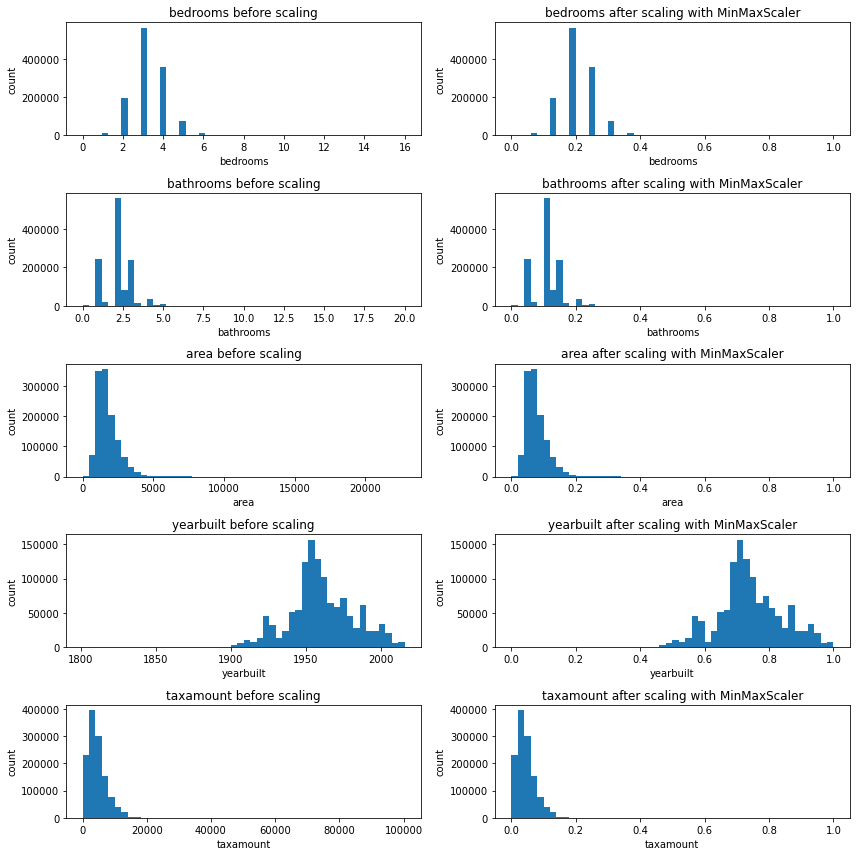

In [10]:
# call function with minmax
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

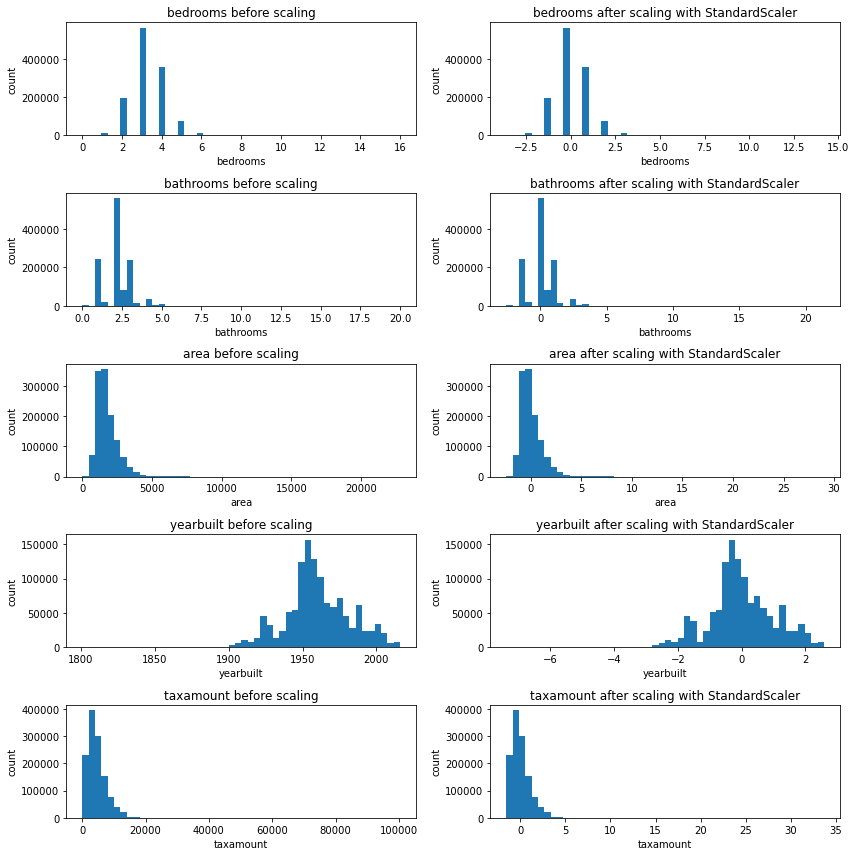

In [11]:
# call function with standard scaler
visualize_scaler(scaler=StandardScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

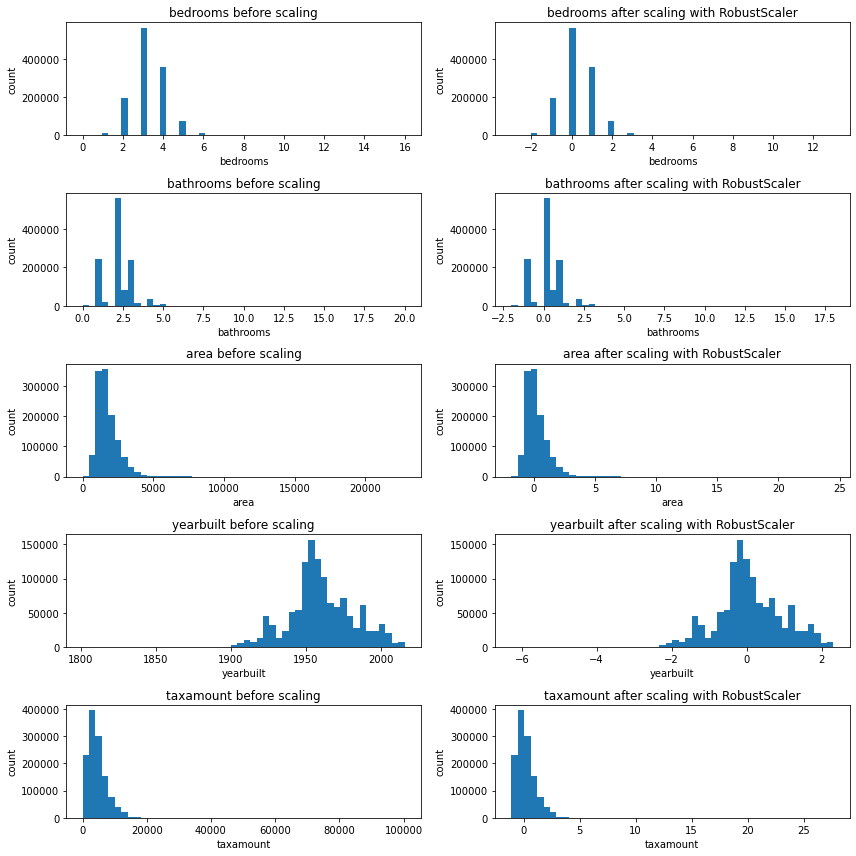

In [12]:
# call function with robustscaler
visualize_scaler(scaler=RobustScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

### Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [15]:
#look at original data
train[to_scale].head()

,bedrooms,bathrooms,area,yearbuilt,taxamount
1571799,4,2.5,2987,2006.0,13617.38
1723554,3,2.0,3013,1977.0,5768.57
718174,4,3.0,2572,1986.0,4944.11
1663206,3,1.0,1589,1959.0,4031.78
1087892,3,2.0,1727,1962.0,2708.80


In [21]:
#make it
scaler = MinMaxScaler()

#fit and use it
train_scaled = scaler.fit_transform(train[to_scale])

#convert to df
train_scaled = pd.DataFrame(train_scaled, columns=to_scale)

In [22]:
#look at scaled data
train_scaled.head()

,bedrooms,bathrooms,area,yearbuilt,taxamount
0,0.2500,0.125,0.130971,0.953488,0.135544
1,0.1875,0.100,0.132111,0.818605,0.057342
2,0.2500,0.150,0.112768,0.860465,0.049128
3,0.1875,0.050,0.069652,0.734884,0.040038
4,0.1875,0.100,0.075705,0.748837,0.026856


In [26]:
#appling the inverse_transform function to the scaled data
inverse_train_scaled = scaler.inverse_transform(train_scaled)
inverse_train_scaled

array([[4.000000e+00, 2.500000e+00, 2.987000e+03, 2.006000e+03,
        1.361738e+04],
       [3.000000e+00, 2.000000e+00, 3.013000e+03, 1.977000e+03,
        5.768570e+03],
       [4.000000e+00, 3.000000e+00, 2.572000e+03, 1.986000e+03,
        4.944110e+03],
       ...,
       [3.000000e+00, 3.000000e+00, 1.841000e+03, 1.955000e+03,
        1.731150e+03],
       [3.000000e+00, 2.000000e+00, 1.406000e+03, 1.956000e+03,
        4.559860e+03],
       [3.000000e+00, 1.000000e+00, 1.571000e+03, 1.948000e+03,
        2.619670e+03]])

In [27]:
#converting 2d array to df and adding column names
pd.DataFrame(inverse_train_scaled, columns=to_scale)

,bedrooms,bathrooms,area,yearbuilt,taxamount
0,4.0,2.5,2987.0,2006.0,13617.38
1,3.0,2.0,3013.0,1977.0,5768.57
2,4.0,3.0,2572.0,1986.0,4944.11
3,3.0,1.0,1589.0,1959.0,4031.78
4,3.0,2.0,1727.0,1962.0,2708.80
...,...,...,...,...,...
1219897,3.0,2.0,1610.0,1984.0,3001.96
1219898,2.0,1.0,900.0,1938.0,3323.92
1219899,3.0,3.0,1841.0,1955.0,1731.15
1219900,3.0,2.0,1406.0,1956.0,4559.86


> we can see that using the inverse_transform function on our scaled data will bring us back to our original data

### Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme

In [28]:
from sklearn.preprocessing import QuantileTransformer

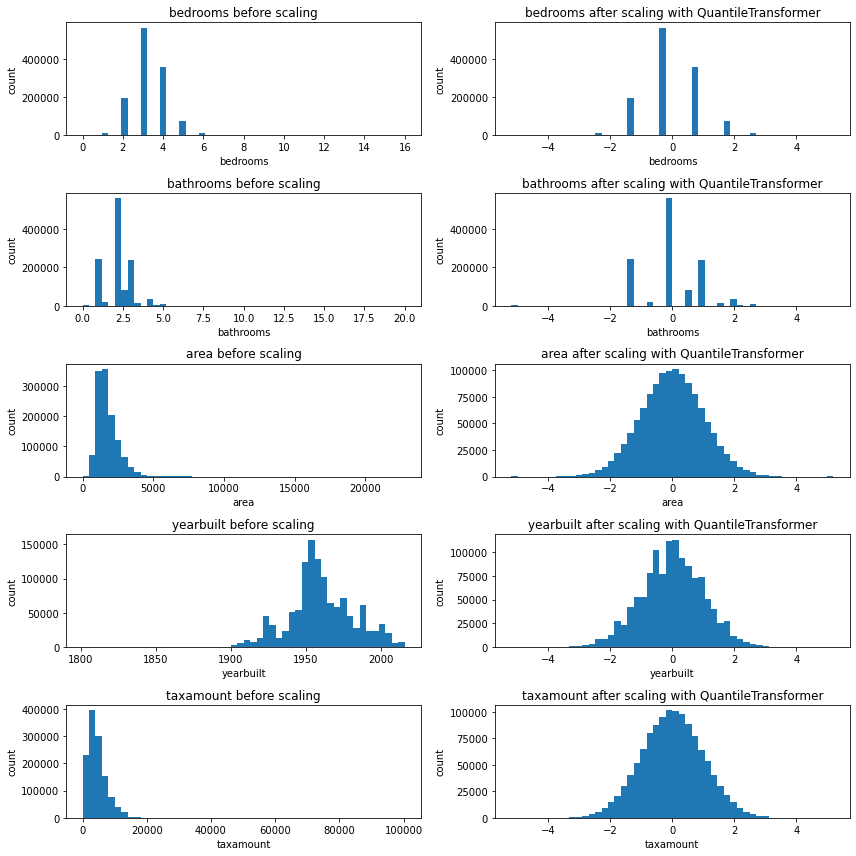

In [29]:
# call function using QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=to_scale, 
                 bins=50)

### Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

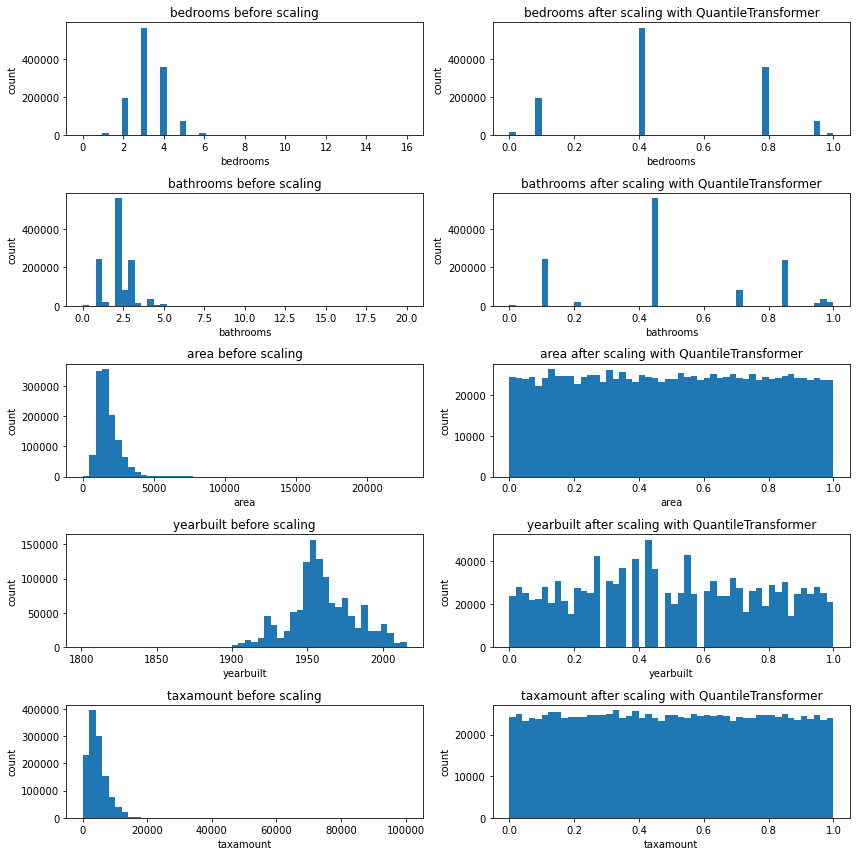

In [30]:
# call function using QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train,
                 columns_to_scale=to_scale, 
                 bins=50)

### Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [8]:
train.head()

,bedrooms,bathrooms,area,propertyvalue,yearbuilt,taxamount,county,Orange,Ventura
1571799,4,2.5,2987,885000,2006.0,13617.38,Orange,1,0
1723554,3,2.0,3013,489511,1977.0,5768.57,LA,0,0
718174,4,3.0,2572,390915,1986.0,4944.11,LA,0,0
1663206,3,1.0,1589,321758,1959.0,4031.78,LA,0,0
1087892,3,2.0,1727,231737,1962.0,2708.80,Ventura,0,1


In [11]:
to_scale

['bedrooms', 'bathrooms', 'area', 'yearbuilt', 'taxamount']

In [12]:
def scale_data(train, 
               validate, 
               test, 
               to_scale):
    #make copies for scaling
    train_scaled = train.copy()
    validate_scaled = test.copy()
    test_scaled = test.copy()

    #scale them!
    #make the thing
    scaler = MinMaxScaler()

    #fit the thing
    scaler.fit(train[to_scale])

    #use the thing
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled

In [13]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, to_scale)

In [14]:
train.head()

,bedrooms,bathrooms,area,propertyvalue,yearbuilt,taxamount,county,Orange,Ventura
1571799,4,2.5,2987,885000,2006.0,13617.38,Orange,1,0
1723554,3,2.0,3013,489511,1977.0,5768.57,LA,0,0
718174,4,3.0,2572,390915,1986.0,4944.11,LA,0,0
1663206,3,1.0,1589,321758,1959.0,4031.78,LA,0,0
1087892,3,2.0,1727,231737,1962.0,2708.80,Ventura,0,1


In [15]:
train_scaled.head()

,bedrooms,bathrooms,area,propertyvalue,yearbuilt,taxamount,county,Orange,Ventura
1571799,0.2500,0.125,0.130971,885000,0.953488,0.135544,Orange,1,0
1723554,0.1875,0.100,0.132111,489511,0.818605,0.057342,LA,0,0
718174,0.2500,0.150,0.112768,390915,0.860465,0.049128,LA,0,0
1663206,0.1875,0.050,0.069652,321758,0.734884,0.040038,LA,0,0
1087892,0.1875,0.100,0.075705,231737,0.748837,0.026856,Ventura,0,1


#### What do I want to explore on? 

In [16]:
train = train.drop(columns=['Orange','Ventura'])

In [17]:
train.head()

,bedrooms,bathrooms,area,propertyvalue,yearbuilt,taxamount,county
1571799,4,2.5,2987,885000,2006.0,13617.38,Orange
1723554,3,2.0,3013,489511,1977.0,5768.57,LA
718174,4,3.0,2572,390915,1986.0,4944.11,LA
1663206,3,1.0,1589,321758,1959.0,4031.78,LA
1087892,3,2.0,1727,231737,1962.0,2708.80,Ventura


#### What do I want to use for modeling?

In [18]:
train_preprocessed = train_scaled.drop(columns=['county'])

In [19]:
train_preprocessed.head()

,bedrooms,bathrooms,area,propertyvalue,yearbuilt,taxamount,Orange,Ventura
1571799,0.2500,0.125,0.130971,885000,0.953488,0.135544,1,0
1723554,0.1875,0.100,0.132111,489511,0.818605,0.057342,0,0
718174,0.2500,0.150,0.112768,390915,0.860465,0.049128,0,0
1663206,0.1875,0.050,0.069652,321758,0.734884,0.040038,0,0
1087892,0.1875,0.100,0.075705,231737,0.748837,0.026856,0,1
